# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


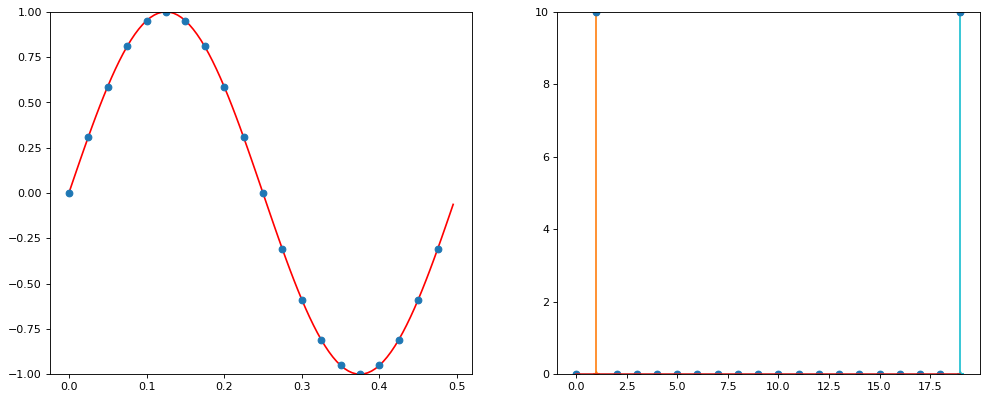

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

<function scr.<locals>.<lambda> at 0x7f3ea6a0d620> [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475] [ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.22464680e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01]


/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


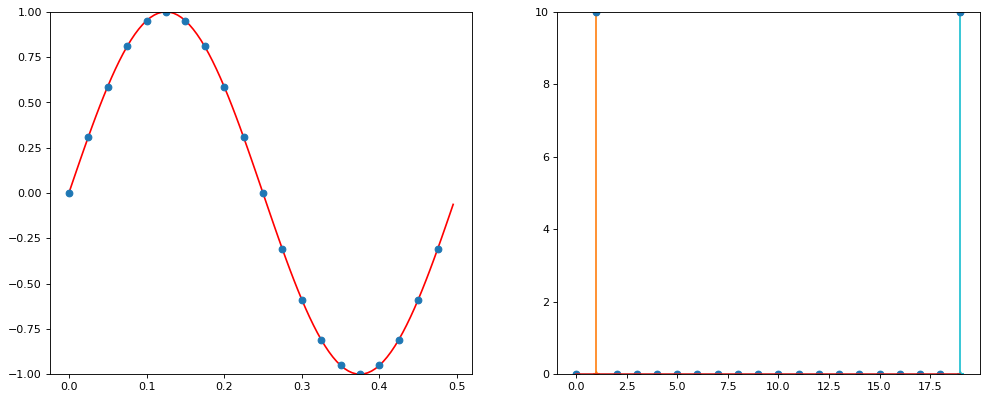

In [2]:
# Zdefiniuj funckję

# A-Amplituda sygnału, LP - liczba przebiegów, w - częstotliwość próbkowania, f - częstotliwość sygnału
def scr(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)
    
    print(FUNC, t, FUNC(t))
    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)
    # modul sygnalu

    freqs = range(int(n))


    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()
scr()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

<function scr.<locals>.<lambda> at 0x7f3ea6b572f0> [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48] [ 0.          0.24868989  0.48175367  0.68454711  0.84432793  0.95105652
  0.99802673  0.98228725  0.90482705  0.77051324  0.58778525  0.36812455
  0.12533323 -0.12533323 -0.36812455 -0.58778525 -0.77051324 -0.90482705
 -0.98228725 -0.99802673 -0.95105652 -0.84432793 -0.68454711 -0.48175367
 -0.24868989]


/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


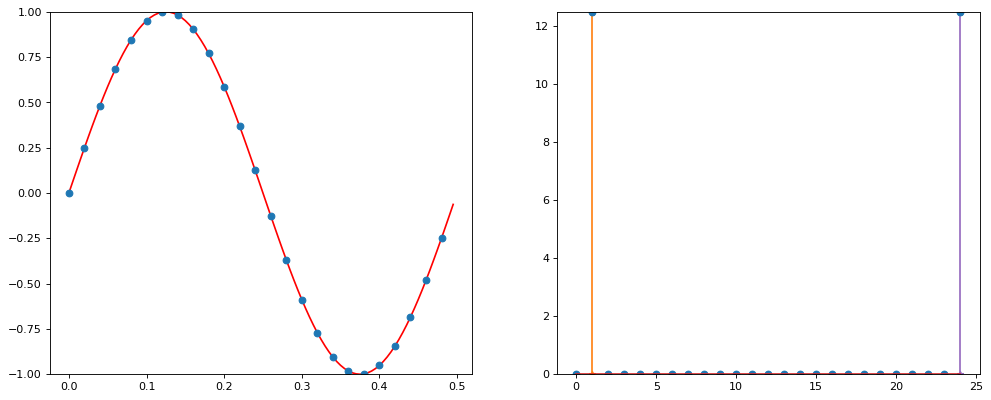

In [4]:
# w=50

scr(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


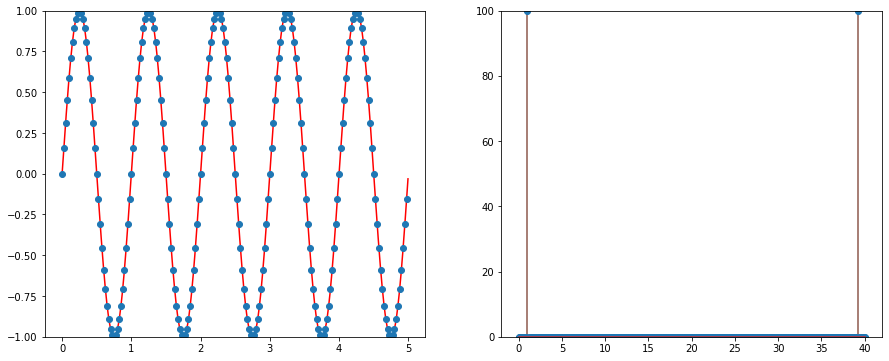

In [5]:
# popraw oś OX

# A-Amplituda sygnału, LP - liczba przebiegów, w - częstotliwość próbkowania, f - częstotliwość sygnału
def scr(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].plot(t, signal, 'o')

    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)
    # modul sygnalu

    freqs = np.linspace(0, w, n)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax[1].set_ylim([0.0,ymax])
    else:
        ax[1].set_ylim([0.0,3.0])
    ax[1].set
    ax[1].stem(freqs, signal1, '-*')

scr(f=1.0, LP=5)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


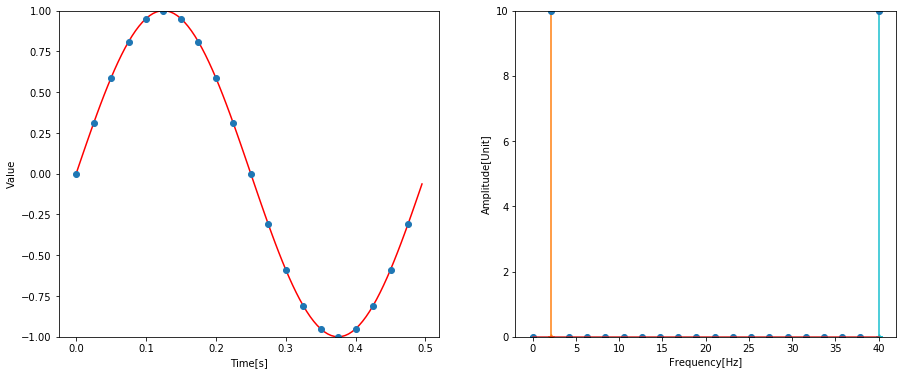

In [7]:
# Podpisz osie wykresów
# A-Amplituda sygnału, LP - liczba przebiegów, w - częstotliwość próbkowania, f - częstotliwość sygnału
def scr(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f   # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    t = np.arange(0, LP*T, TW)   # generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f) # def. funkcji (tutaj sinus)
    signal = FUNC(t) # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].set_xlabel('Time[s]')
    ax[0].set_ylabel('Value')
    
    ax[0].plot(t, signal, 'o')
    
    
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)
    # modul sygnalu

    freqs = np.linspace(0, w, n)
    #freqs=[(x/n)*w for x in freqs]

    ymax = max(signal1)
    if (ymax > 3.0):
        ax[1].set_ylim([0.0,ymax])
    else:
        ax[1].set_ylim([0.0,3.0])
    ax[1].set_ylabel('Amplitude[Unit]')
    ax[1].set_xlabel('Frequency[Hz]')
    ax[1].set
    ax[1].stem(freqs, signal1, '-*')
scr()

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


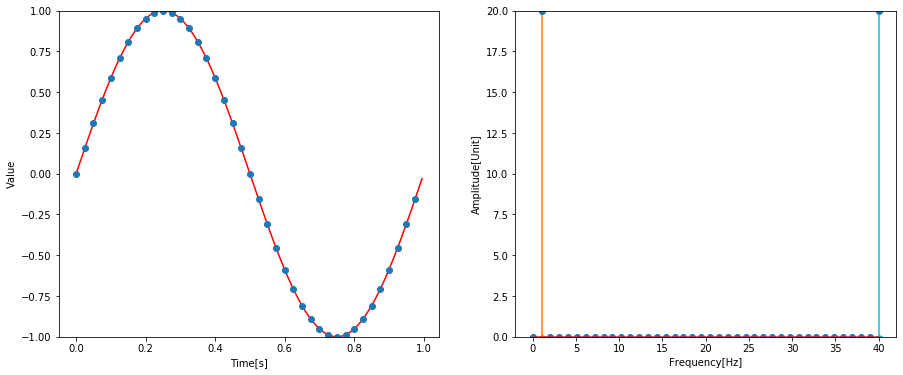

In [8]:
# f=1, A=1, LP=1
scr(f=1, A=1, LP=1)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


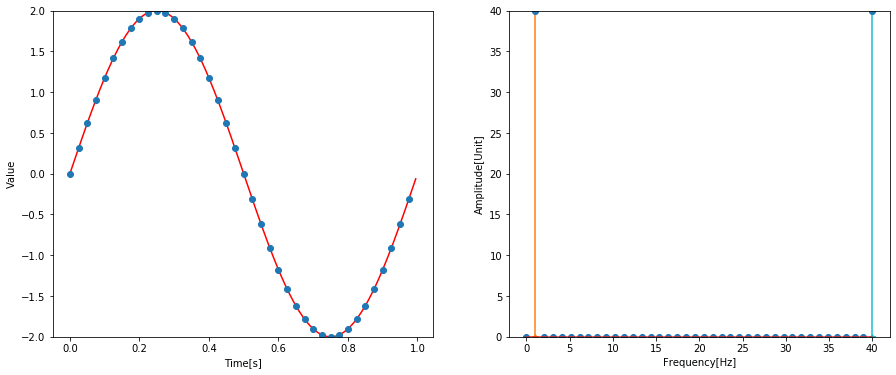

In [9]:
# f=1, A=2, LP=1
scr(f=1, A=2, LP=1)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


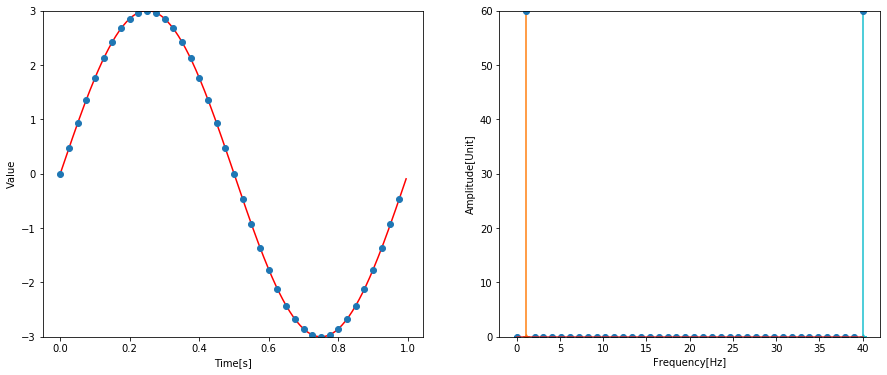

In [10]:
# f=1, A=3, LP=1
scr(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


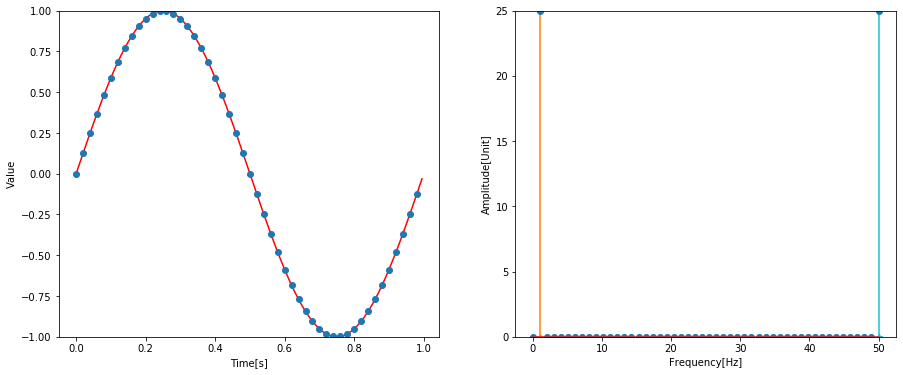

In [11]:
# f=1, w=50, LP=1
scr(f=1, w=50, LP=1)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


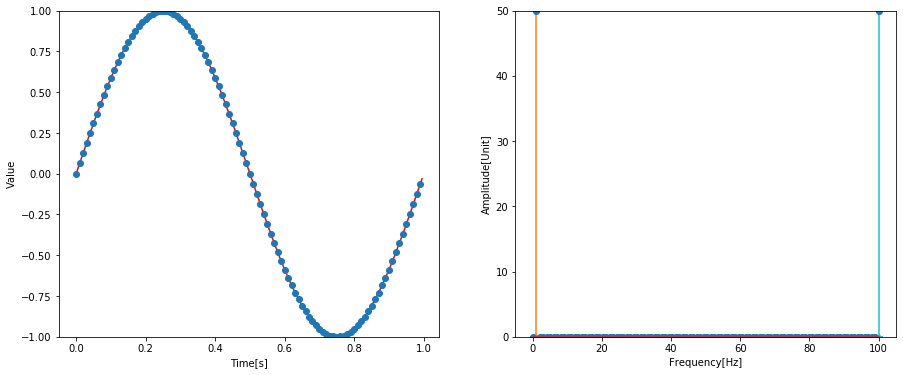

In [12]:
# f=1, w=100, LP=1
scr(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


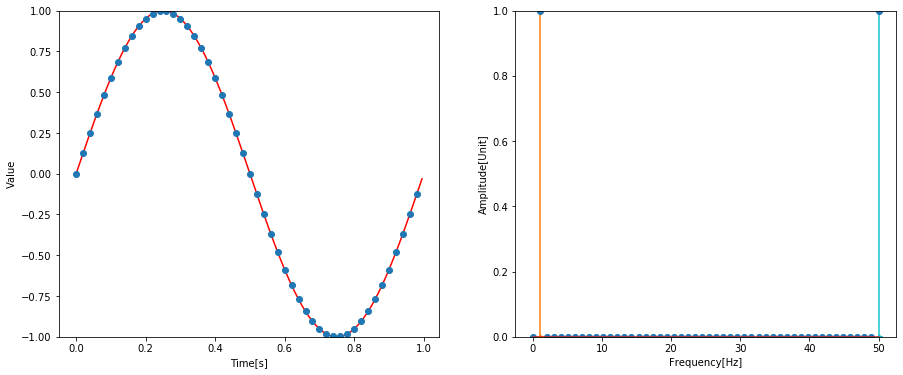

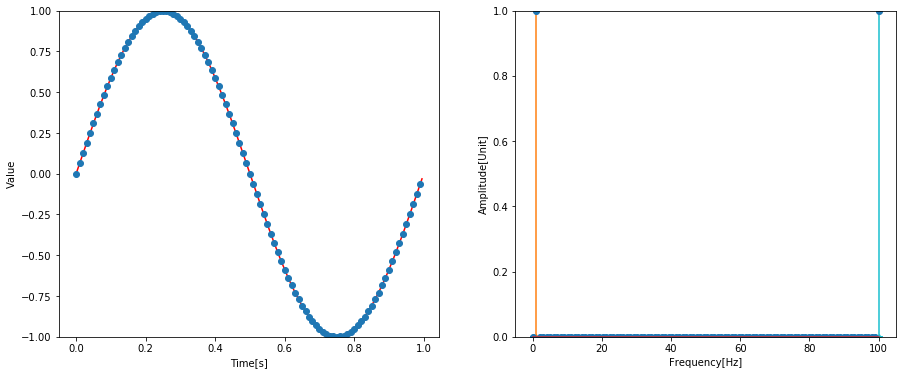

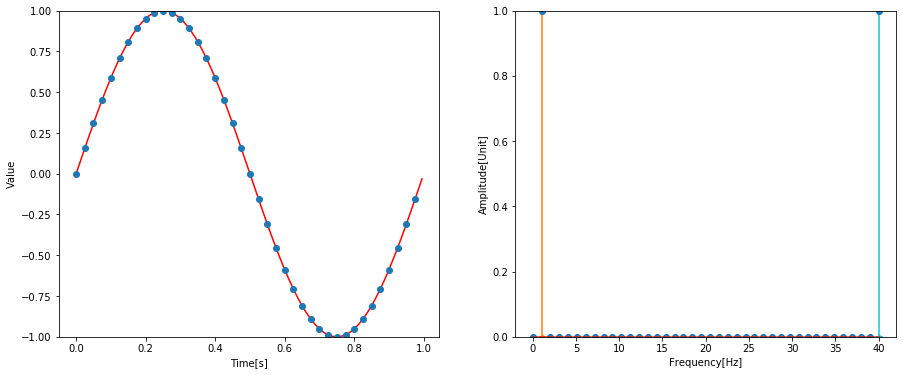

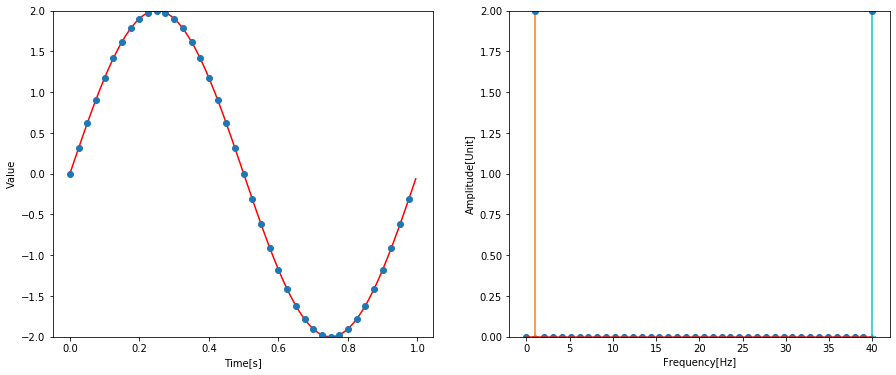

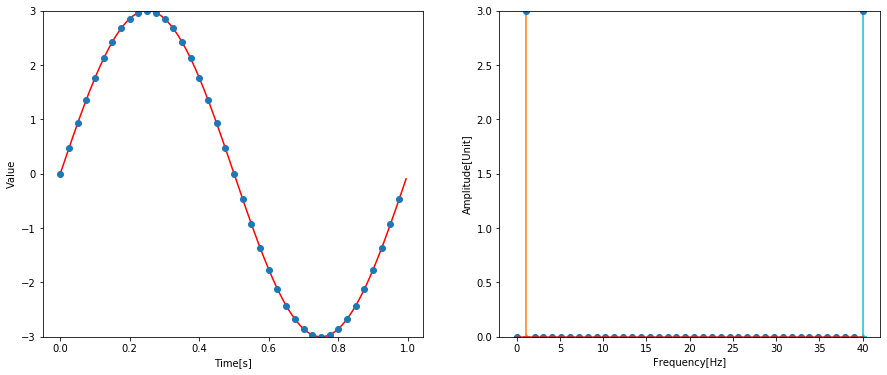

In [41]:
# popraw oś OY
# A-Amplituda sygnału, LP - liczba przebiegów, w - częstotliwość próbkowania, f - częstotliwość sygnału
def scr(A=1, LP=1, w=40, f=2.0):
    T = 1.0/f   # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    t = np.arange(0, LP*T, TW)   # generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f) # def. funkcji (tutaj sinus)
    signal = FUNC(t) # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].set_xlabel('Time[s]')
    ax[0].set_ylabel('Value')
    ax[0].plot(t, signal, 'o')
    
    
    signal1 = fft(signal)  # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) # modul sygnalu

    freqs = np.linspace(0, w, n)
    ymax = max(signal1)
    ax[1].set_ylim([0.0,2*ymax/n])
    
    ax[1].set_ylabel('Amplitude[Unit]')
    ax[1].set_xlabel('Frequency[Hz]')
    ax[1].set
    ax[1].stem(freqs, signal1*(2/n), '-*')
scr(f=1, w=50, LP=1)
scr(f=1, w=100, LP=1)
scr(f=1, A=1, LP=1)
scr(f=1, A=2, LP=1)
scr(f=1, A=3, LP=1)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


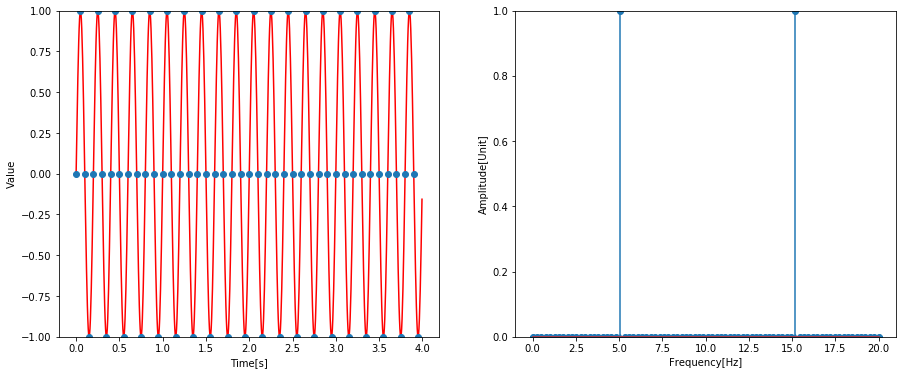

In [42]:
# f=5, w=20, LP=20
scr(f=5, w=20, LP=20)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


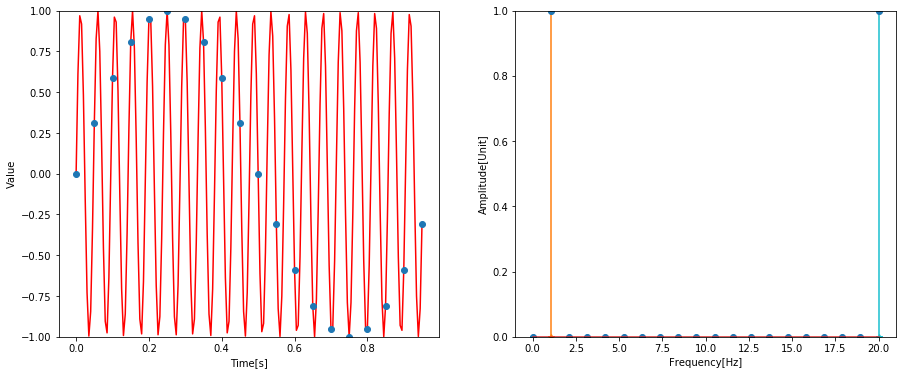

In [43]:
# f=21, w=20, LP=20
scr(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


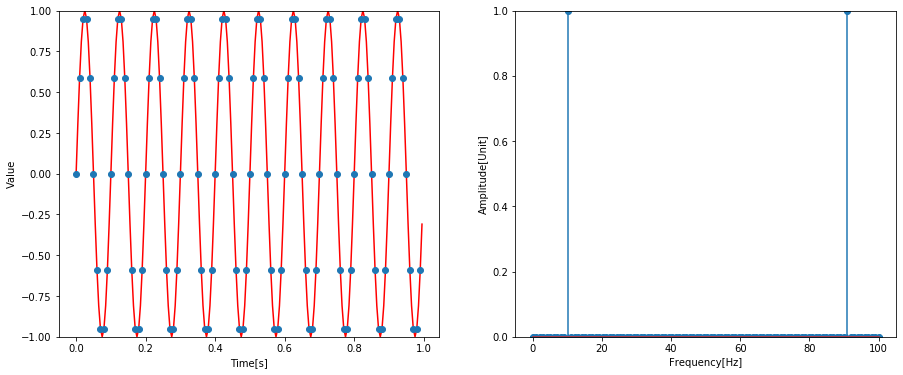

In [44]:
# f=10, w=100, A=1, LP=10
scr(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


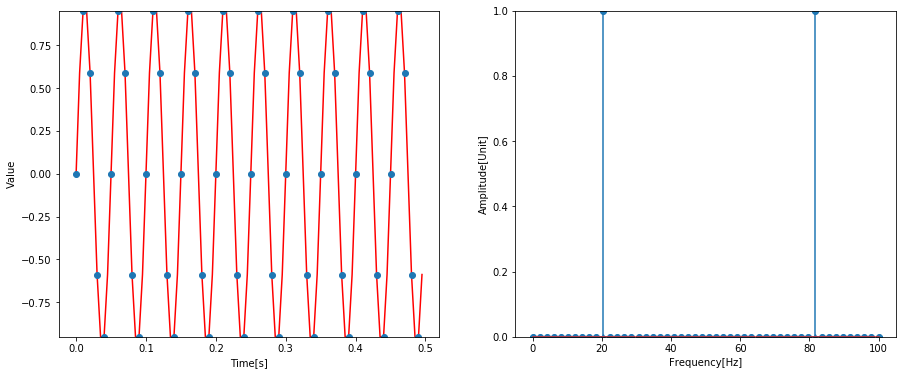

In [45]:
# f=20, w=100, A=1, LP=10
scr(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


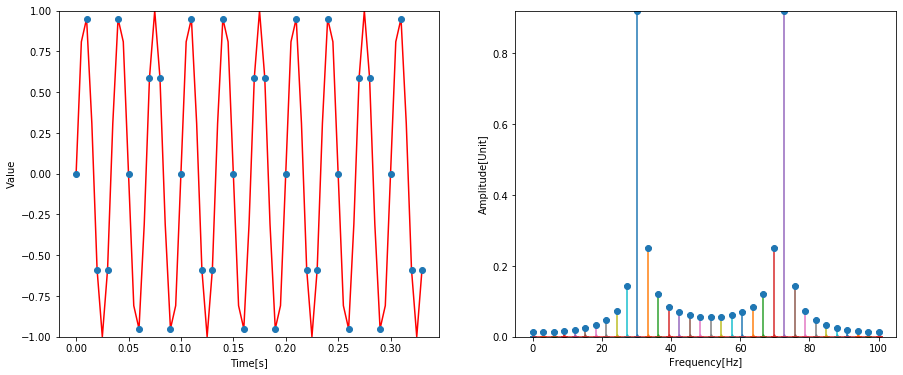

In [46]:
# f=30, w=100, A=1, LP=10

#Bo (w*LP)%f!=0
scr(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


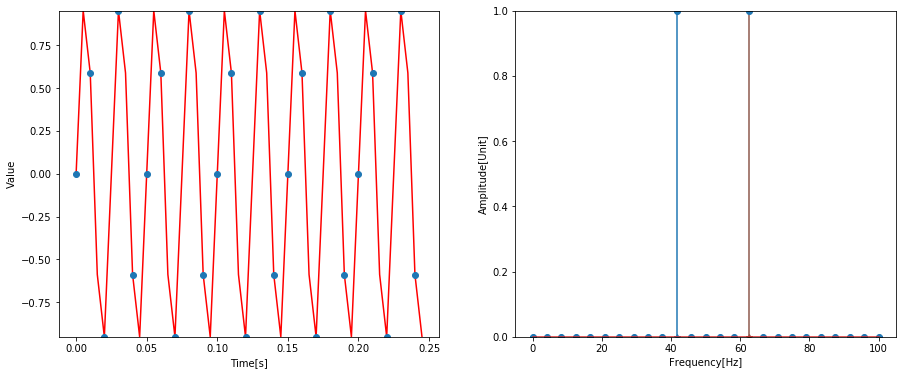

In [47]:
# f=40, w=100, A=1, LP=10
scr(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


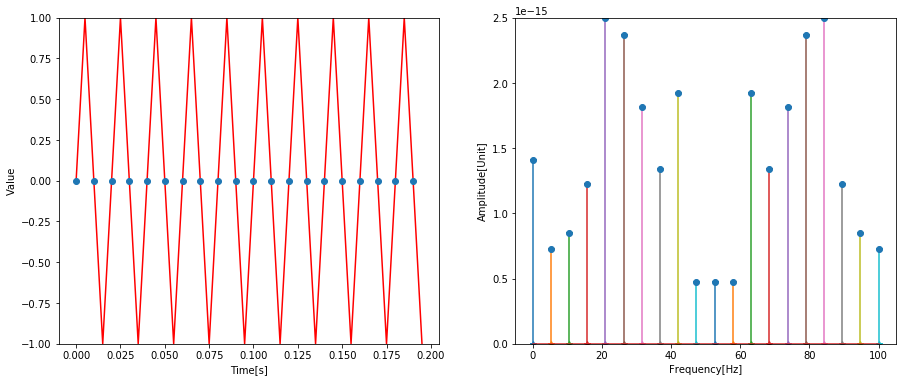

In [48]:
# f=50, w=100, A=1, LP=10
scr(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


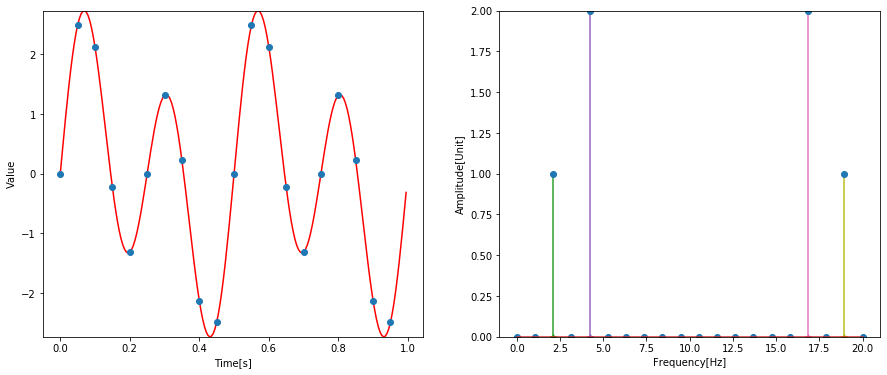

In [104]:
# A-Amplituda sygnału, LP - liczba przebiegów, w - częstotliwość próbkowania, f - częstotliwość sygnału

def scr(A=1, LP=1, w=40, f=2.0, FUNC=lambda t : A*sin(2*pi*t*f)):
    T = 1.0/f   # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    t = np.arange(0, LP*T, TW)   # generujemy momenty, w których pobieramy próbki
    n = len(t)

    signal = FUNC(t) # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].set_xlabel('Time[s]')
    ax[0].set_ylabel('Value')
    ax[0].plot(t, signal, 'o')
    
    
    signal1 = fft(signal)  # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) # modul sygnalu

    freqs = np.linspace(0, w, n)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax[1].set_ylim([0.0,2*ymax/n])
    else:
        ax[1].set_ylim([0.0,6.0/n])
    ax[1].set_ylabel('Amplitude[Unit]')
    ax[1].set_xlabel('Frequency[Hz]')
    ax[1].set
    ax[1].stem(freqs, signal1*(2/n), '-*')



# Wyrysuj sygnał
scr(f=1, w=20, FUNC=lambda t: 1*sin(2*pi*t*f)+2*sin(4*pi*t*f))

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


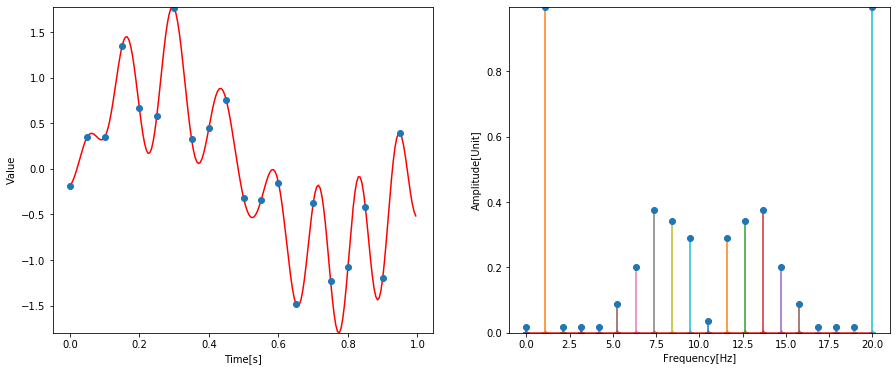

In [106]:
def scr2(A=1, LP=1, w=40, f=2.0, FUNC=lambda t : A*sin(2*pi*t*f)):
    T = 1.0/f   # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    t = np.arange(0, LP*T, TW)   # generujemy momenty, w których pobieramy próbki
    n = len(t)
    
    am=[(np.random.rand()*(0.08-0.02))+0.02 for i in range(100)]
    fr=[(np.random.rand()*(10-5))+5 for i in range(100)]
    phase=[(np.random.rand()*2*math.pi) for i in range(100)]
    def FUNC(t):
        x=[[am[i]*sin(2*pi*t[j]*fr[i]+phase[i]) for i in range(100)] for j in range(len(t))]
        return np.sum(x, axis=1)+A*sin(2*pi*t*f)
    
    signal = FUNC(t) # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].set_xlabel('Time[s]')
    ax[0].set_ylabel('Value')
    ax[0].plot(t, signal, 'o')
    
    
    signal1 = fft(signal)  # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) # modul sygnalu

    freqs = np.linspace(0, w, n)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax[1].set_ylim([0.0,2*ymax/n])
    else:
        ax[1].set_ylim([0.0,6.0/n])
    ax[1].set_ylabel('Amplitude[Unit]')
    ax[1].set_xlabel('Frequency[Hz]')
    ax[1].set
    ax[1].stem(freqs, signal1*(2/n), '-*')
scr2(w=20, f=1.0)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

-90.0


/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


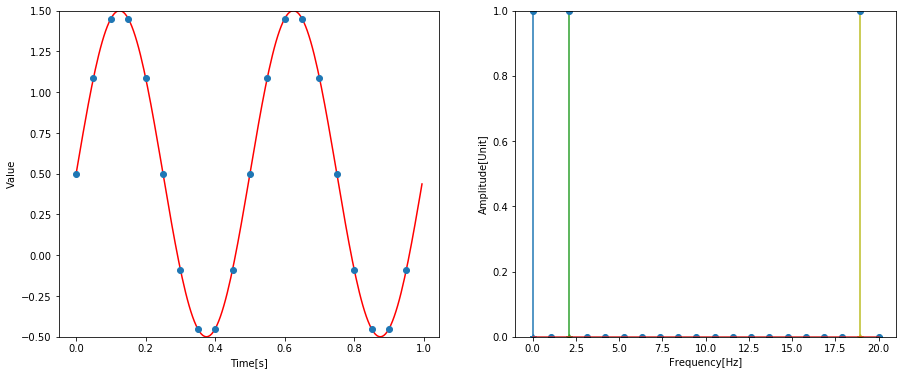

In [71]:
# Wyrysuj sygnał
#Wszystkie elementy poza 1 muszą być symetryczne -> symetria prawidłowa
scr(A=2, f=1.0, w=20, FUNC=lambda t : A*sin(2*pi*t*f)+0.5)

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

-90.00000000000001


/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


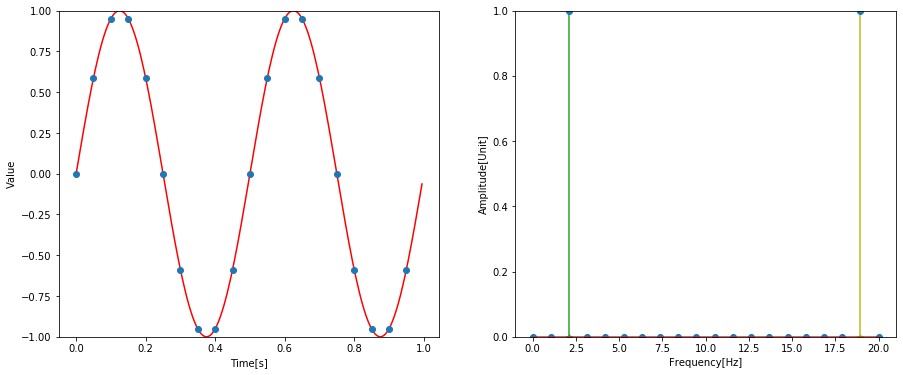

In [67]:
def scr(A=1, LP=1, w=40, f=2.0, FUNC=lambda t : A*sin(2*pi*t*f)):
    T = 1.0/f   # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    t = np.arange(0, LP*T, TW)   # generujemy momenty, w których pobieramy próbki
    n = len(t)

    signal = FUNC(t) # funkcja sprobkowana

    fig, ax = plt.subplots(1,2,figsize=(15, 6)) 
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax[0].plot(base_t, base_signal, linestyle='-', color='red')
    ax[0].set_ylim([min(base_signal), max(base_signal)])
    ax[0].set_xlabel('Time[s]')
    ax[0].set_ylabel('Value')
    ax[0].plot(t, signal, 'o')
    
    
    signal0 = fft(signal)  # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal0) # modul sygnalu
    print(angle(signal0[argmax(signal1)], deg=True))

    freqs = np.linspace(0, w, n)
    ymax = max(signal1)
    ax[1].set_ylim([0.0,2*ymax/n])
    
    ax[1].set_ylabel('Amplitude[Unit]')
    ax[1].set_xlabel('Frequency[Hz]')
    ax[1].set
    ax[1].stem(freqs, signal1*(2/n), '-*')


# faza = 0
scr(A=1, f=1.0, w=20, FUNC=lambda t : A*sin(2*pi*t*f))

-44.99999999999999


/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


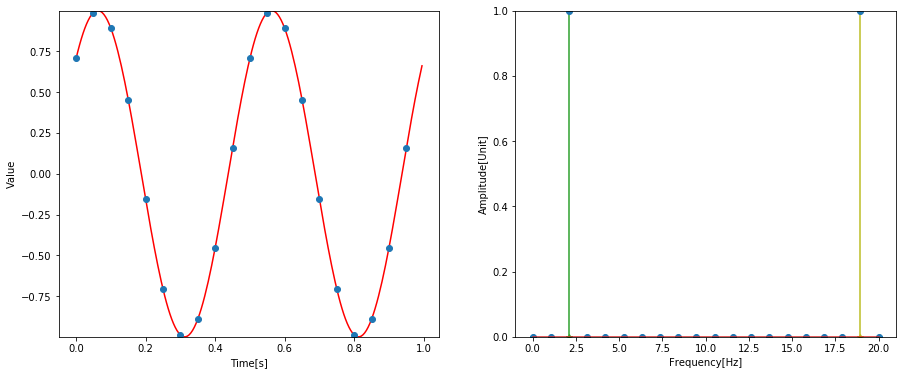

In [68]:
# faza = pi/4
scr(A=1, f=1.0, w=20, FUNC=lambda t : A*sin(2*pi*t*f+math.pi/4))

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [17]:
# wygeneruj wektor x
x=random.random(10)

In [18]:
# oblicz fft z x
z=fft(x)

In [19]:
# oblicz ifft
y=ifft(z)

In [20]:
#porownaj x z ifft(fft(x)), wystarczy print
#Nie została stracona
print(x, y)

[0.07171998 0.89933277 0.34534667 0.68589559 0.78924896 0.33017478
 0.77809394 0.93317394 0.47799199 0.45825298] [0.07171998+0.j 0.89933277+0.j 0.34534667+0.j 0.68589559+0.j
 0.78924896+0.j 0.33017478+0.j 0.77809394+0.j 0.93317394+0.j
 0.47799199+0.j 0.45825298+0.j]
